Aidan Yokuda
EE 341
12/15/2021

AudioPreprocessing and autoEncoder Performance


For a brief background of use cases for auto-encoders such as this one, automation and AI based algorithms provide great flexibilities for industrial systems to achieve higher productivity, resource efficiency and reduced lead times. Detection of failures or anomalous behavior within these systems is critical to operation and monitoring of audio emitted from machines may be useful for machine operation state tracking. Conditions in industrial factories do not allow for every possible type of anomaly so this makes simple binary classification impractical. To achieve tracking, the model must identify unknown (out of sample) sounds while only training on the normal audio samples.
	The raw data therefore comes in the form of audio samples, which are labeled based on the machine type and specific machine that produced them. For each machine, each of the four machine IDs has over 1000 training samples and around 615 test audio samples.
	The audio files are then processed such that each audio file has 200 overlapping STFTs that summarize frequency signature in 128 distinct bands to create a mel spectrogram.

 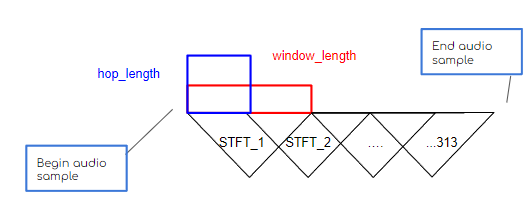
 
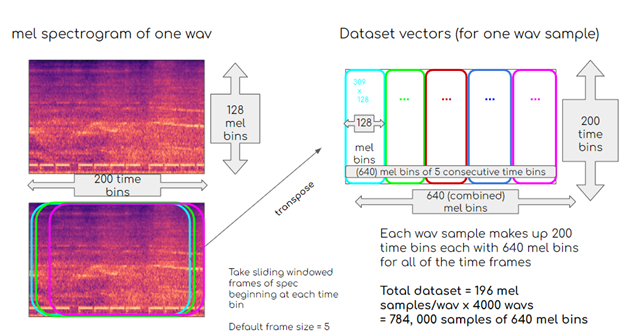

The audo-encoder is then made with the following structure:
•	Autoencoder with 9 Hidden Layer Dense Network with middle layer as a bottleneck
•	4x128, 8, 4x128 node archt.
•	ReLU and BachNorm after each hidden layer
•	Model takes in 640 inputs describing a time slice of audio sample
•	Audio sample processed in 200 time slices and anomaly score is the MSE between inputs and outputs averaged over the 200 time slices
•	Benchmark model is 32 bit unpruned model

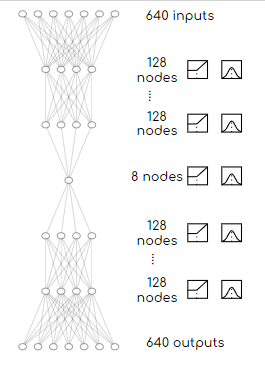
 
The scope for my project is to experiment with the different parameters for the data pre-processing. This includes:
•	Frames
•	Hop length (number of samples between successive frames)
•	N_fft (length of the FFT window)
•	N_mels (number of mel bins)
•	Power (Exponent for the magnitude melspectrogram)
By the end of the project, I will have shown how each of these parameters directly affect the training data and showcase the effects of these different parameters to model performance. 



Setting up Enviornment for training
Note: I will also have the results saved to the notebook since gathering the dataset and training will take some time

In [1]:
!git clone https://github.com/AidanYok/EE341FinalProject.git

Cloning into 'EE341FinalProject'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 125 (delta 47), reused 93 (delta 25), pack-reused 0
Receiving objects: 100% (125/125), 50.24 MiB | 13.91 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
%cd EE341FinalProject

/content/EE341FinalProject


In [ ]:
#@markdown Get Dataset
!bash get_dataset.sh

In [ ]:
#@markdown Install Packages
#enviornment packages
!python depens.py


In [7]:
#@markdown import Packages 

########################################################################
# import default python-library
########################################################################
import os
import numpy as np
import matplotlib.pyplot as plt
from training import train
from testing import test


Using TensorFlow backend.


Set the different parametes for preProcessing

 Note that the default parameters are as given:

n_Mels = 128;
Frames = 5;
n_FFT = 1024;
hop_Length = 512;
Power = 2.0;

lets play around with these parameters and evualuate their performance to how the parameters effect how the model learns



First lets get a baseline for the data

In [ ]:
train()
currAUC, currPAUC = test()
print(currAUC)
print(currPAUC)

AUC = 0.6783059094993057
PAUC = 0.5679196920259482



Note that we will not be altering the Power variable, as Power determines which type of mel spectorgram the package librosa creates. It takes in the parameters 1.0 and 2.0 for engergy and power repectivly. The preprocessing algorithm is written to take the power melspectorgram and to convert it to decibels so that it can better represent its application (hearing malfunctions in machinery) and so I will keep that the same to avoid breaking the entire training model. 

Instead, lets see how the dims effect the model performance. By default, there are 640 dims for the preprocessing (dims = n_mels * frames), so lets try decreaseing that by a factor of 2, so we can get 320 dims with 32 n_mels and 10 frames

In [ ]:
Frames = 10
nMels = 32

train(Frames = 10, n_Mels = 32)
currAUC, currPAUC = test()
print(currAUC)
print(currPAUC)

2021-12-15 16:04:24,303 - INFO - load_directory <- development
2021-12-15 16:04:24,307 - INFO - target_dir : /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar
2021-12-15 16:04:24,453 - INFO - train_file num : 7000
generate train_dataset:   0%|          | 0/7000 [00:00<?, ?it/s]


[1/1] /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar
============== DATASET_GENERATOR ==============


generate train_dataset: 100%|██████████| 7000/7000 [09:18<00:00, 12.53it/s]


============== MODEL TRAINING ==============
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                5152      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (N

2021-12-15 16:38:16,317 - INFO - save_model -> ./model/model_ToyCar.hdf5
2021-12-15 16:38:16,318 - INFO - load_directory <- development


============== END TRAINING ==============

[1/1] /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar
============== MODEL LOAD ==============


2021-12-15 16:38:18,959 - INFO - target_dir : /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar_id_01
2021-12-15 16:38:18,972 - INFO - test_file  num : 614
  0%|          | 0/614 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                5152      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
__________

100%|██████████| 614/614 [01:24<00:00,  7.23it/s]
2021-12-15 16:39:43,901 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_01.csv
2021-12-15 16:39:43,936 - INFO - AUC : 0.699025974025974
2021-12-15 16:39:43,939 - INFO - pAUC : 0.6021303258145363
2021-12-15 16:39:43,940 - INFO - target_dir : /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar_id_02
2021-12-15 16:39:43,994 - INFO - test_file  num : 615
  0%|          | 0/615 [00:00<?, ?it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:45<00:00, 13.46it/s]
2021-12-15 16:40:29,705 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_02.csv
2021-12-15 16:40:29,720 - INFO - AUC : 0.7637520215633423
2021-12-15 16:40:29,725 - INFO - pAUC : 0.6691161866931479
2021-12-15 16:40:29,726 - INFO - target_dir : /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar_id_03
2021-12-15 16:40:29,751 - INFO - test_file  num : 615
  0%|          | 2/615 [00:00<00:41, 14.81it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [01:28<00:00,  6.95it/s]
2021-12-15 16:41:58,256 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_03.csv
2021-12-15 16:41:58,291 - INFO - AUC : 0.5779946091644205
2021-12-15 16:41:58,294 - INFO - pAUC : 0.5307703220314939
2021-12-15 16:41:58,296 - INFO - target_dir : /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar_id_04
2021-12-15 16:41:58,352 - INFO - test_file  num : 615
  0%|          | 0/615 [00:00<?, ?it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:45<00:00, 13.57it/s]
2021-12-15 16:42:43,707 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_04.csv
2021-12-15 16:42:43,718 - INFO - AUC : 0.7414016172506739
2021-12-15 16:42:43,721 - INFO - pAUC : 0.5980706483189104
2021-12-15 16:42:43,725 - INFO - load_directory <- development
2021-12-15 16:42:43,728 - INFO - target_dir : /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar
2021-12-15 16:42:43,781 - INFO - train_file num : 7000
generate train_dataset:   0%|          | 3/7000 [00:00<04:43, 24.67it/s]


============ END OF TEST FOR A MACHINE ID ============

[1/1] /home/ubuntu/ML/EE341FinalProject/dev_data/ToyCar
============== DATASET_GENERATOR ==============


generate train_dataset: 100%|██████████| 7000/7000 [10:58<00:00, 10.63it/s]


============== MODEL TRAINING ==============
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 640)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                20512     
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
activation_5 (Activation)    (N

KeyboardInterrupt: 

AUC = 0.680645307522666
PAUC = 0.5831891048375656
We see here a performance increase!

Now lets see if the performance is based on the amount of dims. Therefore lets set n_mels to 160 and frames to 2.

In [9]:
Frames = 2
n_Mels = 160

train(Frames = 2, n_Mels = 160)
currAUC, currPAUC = test(Frames = 2, n_Mels = 160)

print(currAUC)
print(currPAUC)

2021-12-16 03:13:24,178 - INFO - load_directory <- development



[1/1] /content/EE341FinalProject/dev_data/ToyCar
============== MODEL LOAD ==============


2021-12-16 03:13:26,650 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_01
2021-12-16 03:13:26,663 - INFO - test_file  num : 614
  0%|          | 0/614 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                10272     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
__________

100%|██████████| 614/614 [00:33<00:00, 18.50it/s]
2021-12-16 03:13:59,874 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_01.csv
2021-12-16 03:13:59,882 - INFO - AUC : 0.6861363636363637
2021-12-16 03:13:59,886 - INFO - pAUC : 0.564023695602643
2021-12-16 03:13:59,893 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_02
2021-12-16 03:13:59,911 - INFO - test_file  num : 615
  0%|          | 2/615 [00:00<00:34, 17.73it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:33<00:00, 18.46it/s]
2021-12-16 03:14:33,257 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_02.csv
2021-12-16 03:14:33,265 - INFO - AUC : 0.7344582210242587
2021-12-16 03:14:33,269 - INFO - pAUC : 0.5817846503050078
2021-12-16 03:14:33,276 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_03
2021-12-16 03:14:33,294 - INFO - test_file  num : 615
  0%|          | 2/615 [00:00<00:33, 18.16it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:33<00:00, 18.43it/s]
2021-12-16 03:15:06,685 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_03.csv
2021-12-16 03:15:06,699 - INFO - AUC : 0.579633423180593
2021-12-16 03:15:06,709 - INFO - pAUC : 0.5239040998723223
2021-12-16 03:15:06,721 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_04
2021-12-16 03:15:06,738 - INFO - test_file  num : 615
  0%|          | 2/615 [00:00<00:33, 18.53it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:33<00:00, 18.22it/s]
2021-12-16 03:15:40,516 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_04.csv
2021-12-16 03:15:40,530 - INFO - AUC : 0.7954501347708895
2021-12-16 03:15:40,531 - INFO - pAUC : 0.6228117463469995



============ END OF TEST FOR A MACHINE ID ============
0.6989195356530262
0.5731310480317431


AUC = 0.6989195356530262
PAUC = 0.5731310480317431

We see here once again decreasing the dims to 320 actually increased performance. We can Interpreate this as the less dims there are, the more of the raw audio data is being transformed into the mel domain via the STFT. This would then mean that the STFT can better interperate the change in frequency and so provide better data for the model to train. Is imporant to notice we actually got similar performance to useing the same amount of dims but different values for n_mels and frames (32 and 10) which shows that the the important aspect is the dims itself rather than those independent variables when it comes to machine learning.

To better see how the dims effect performance lets decrease them again with the default amount of n_mels but a lesser amount of frames, so 128 n_mels and 2 frames to make 256 dims

In [10]:
Frames = 2
n_Mels = 128

train(Frames = 2, n_Mels = 128)
currAUC, currPAUC = test(Frames = 2, n_Mels = 128)

print(currAUC)
print(currPAUC)

2021-12-16 03:17:28,845 - INFO - load_directory <- development
2021-12-16 03:17:28,852 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar
2021-12-16 03:17:28,884 - INFO - train_file num : 7000
generate train_dataset:   0%|          | 0/7000 [00:00<?, ?it/s]


[1/1] /content/EE341FinalProject/dev_data/ToyCar
============== DATASET_GENERATOR ==============


generate train_dataset: 100%|██████████| 7000/7000 [03:02<00:00, 38.34it/s]


============== MODEL TRAINING ==============
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                8224      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
activation_5 (Activation)    (N

2021-12-16 03:54:06,708 - INFO - save_model -> ./model/model_ToyCar.hdf5
2021-12-16 03:54:06,731 - INFO - load_directory <- development


============== END TRAINING ==============

[1/1] /content/EE341FinalProject/dev_data/ToyCar
============== MODEL LOAD ==============


2021-12-16 03:54:10,695 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_01
2021-12-16 03:54:10,711 - INFO - test_file  num : 614
  0%|          | 0/614 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                8224      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
activation_5 (Activation)    (None, 8)                 0         
__________

100%|██████████| 614/614 [06:09<00:00,  1.66it/s]
2021-12-16 04:00:20,255 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_01.csv
2021-12-16 04:00:20,271 - INFO - AUC : 0.6784307359307359
2021-12-16 04:00:20,273 - INFO - pAUC : 0.5431191615402142
2021-12-16 04:00:20,278 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_02
2021-12-16 04:00:20,290 - INFO - test_file  num : 615
  0%|          | 0/615 [00:00<?, ?it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [02:46<00:00,  3.70it/s]
2021-12-16 04:03:06,446 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_02.csv
2021-12-16 04:03:06,454 - INFO - AUC : 0.7318382749326147
2021-12-16 04:03:06,456 - INFO - pAUC : 0.5735565328415378
2021-12-16 04:03:06,460 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_03
2021-12-16 04:03:06,477 - INFO - test_file  num : 615
  0%|          | 0/615 [00:00<?, ?it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [01:22<00:00,  7.47it/s]
2021-12-16 04:04:28,845 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_03.csv
2021-12-16 04:04:28,855 - INFO - AUC : 0.5712345013477089
2021-12-16 04:04:28,860 - INFO - pAUC : 0.5108526032061286
2021-12-16 04:04:28,866 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_04
2021-12-16 04:04:28,878 - INFO - test_file  num : 615
  0%|          | 3/615 [00:00<00:29, 20.67it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [01:17<00:00,  7.98it/s]
2021-12-16 04:05:45,923 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_04.csv
2021-12-16 04:05:45,932 - INFO - AUC : 0.7805714285714286
2021-12-16 04:05:45,934 - INFO - pAUC : 0.6019860973187686



============ END OF TEST FOR A MACHINE ID ============
0.690518735195622
0.5573785987266623


AUC = 0.690518735195622
PAUC = 0.5573785987266623

Here we see that that there is still an increase in overall performance, but a decrease in PAUC. This tells us that even though a decrease in dims increases performance, too big of a decrease can make the model suffer in performance with predicted real world performance. This can be explained as a large decrease in dims makes the model learn too closly to the dataset itself, and so it would perform well on data that matches the training data, but worser to data that it has not seen before. A non-machine learning way of looking at this would be if a piano player spent all of their time getting good at one song, but was not good at playing others since they got too used to playing just one.

The the preprocessing, we perform a STFT on the auto samples (Short time fouier transform). A STFT differs from a traditonal DFT since a STFT works by taking a DFT in small segments that slide over time, which then tells how the frequency changes over time. For example, where the high and low pitches were in music, you could apply the STFT. This would give you a DFT that changes with time. his would not be readily apparent from just applying the DFT to the entire time series, as it gives one set of components that isn’t time dependent.

These segments have the length n_fft. Usually these segments overlap (in order to avoid information loss), so the distance between two segments is often not n_fft, but something like n_fft/2. The name for this distance is hop_length. Lets raise the n_fft to see if that has any drastic change to model performace, and keep hoplength to n_fft/2.

In [ ]:
n_FFT = 2048
hop_Length = n_FFT / 2
train(n_FFT = n_FFT, hop_Length = hop_Length)
currAUC, currPAUC = test()
print(currAUC)
print(currPAUC)

AUC = 0.6199501245609736
PAUC = 0.5414521509605918

We see here that we lost a considerable amount of performace. We can account for this for the fact that the larger window size actually overgeneralized the change in frequncy within the FTFT and so negativly effected how the model was able to learn from the data

Now lets see if we increase the hop length what effect that has on performance, lets set it to be the same thing as n_fft to see the effect of performing the STFT on each window independently

In [8]:
n_FFT = 2048
hop_Length = n_FFT

train(n_FFT = n_FFT, hop_Length = hop_Length)
currAUC, currPAUC = test()
print(currAUC)
print(currPAUC)

2021-12-16 01:56:23,890 - INFO - load_directory <- development
2021-12-16 01:56:23,896 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar
2021-12-16 01:56:23,944 - INFO - train_file num : 7000
generate train_dataset:   0%|          | 0/7000 [00:00<?, ?it/s]


[1/1] /content/EE341FinalProject/dev_data/ToyCar
============== DATASET_GENERATOR ==============


generate train_dataset: 100%|██████████| 7000/7000 [01:54<00:00, 60.99it/s]


============== MODEL TRAINING ==============
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                20512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (N

2021-12-16 02:03:09,284 - INFO - save_model -> ./model/model_ToyCar.hdf5
2021-12-16 02:03:09,286 - INFO - load_directory <- development


============== END TRAINING ==============

[1/1] /content/EE341FinalProject/dev_data/ToyCar
============== MODEL LOAD ==============


2021-12-16 02:03:10,951 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_01
2021-12-16 02:03:10,962 - INFO - test_file  num : 614
  0%|          | 0/614 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                20512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
__________

100%|██████████| 614/614 [00:27<00:00, 22.24it/s]
2021-12-16 02:03:38,579 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_01.csv
2021-12-16 02:03:38,599 - INFO - AUC : 0.6238636363636364
2021-12-16 02:03:38,601 - INFO - pAUC : 0.5039872408293461
2021-12-16 02:03:38,607 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_02
2021-12-16 02:03:38,630 - INFO - test_file  num : 615
  0%|          | 3/615 [00:00<00:24, 25.35it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:27<00:00, 22.29it/s]
2021-12-16 02:04:06,236 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_02.csv
2021-12-16 02:04:06,244 - INFO - AUC : 0.6757951482479785
2021-12-16 02:04:06,247 - INFO - pAUC : 0.5051780394382182
2021-12-16 02:04:06,253 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_03
2021-12-16 02:04:06,271 - INFO - test_file  num : 615
  0%|          | 3/615 [00:00<00:28, 21.35it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:27<00:00, 22.07it/s]
2021-12-16 02:04:34,155 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_03.csv
2021-12-16 02:04:34,161 - INFO - AUC : 0.5349865229110512
2021-12-16 02:04:34,162 - INFO - pAUC : 0.5199886508724642
2021-12-16 02:04:34,167 - INFO - target_dir : /content/EE341FinalProject/dev_data/ToyCar_id_04
2021-12-16 02:04:34,193 - INFO - test_file  num : 615
  0%|          | 3/615 [00:00<00:27, 22.23it/s]


============ END OF TEST FOR A MACHINE ID ============



============== BEGIN TEST FOR A MACHINE ID ==============


100%|██████████| 615/615 [00:27<00:00, 22.23it/s]
2021-12-16 02:05:01,867 - INFO - anomaly score result ->  ./result/anomaly_score_ToyCar_id_04.csv
2021-12-16 02:05:01,873 - INFO - AUC : 0.6636549865229111
2021-12-16 02:05:01,877 - INFO - pAUC : 0.5466591005816428



============ END OF TEST FOR A MACHINE ID ============
0.6245750735113943
0.5189532579304177


AUC =  0.6245750735113943
PAUC = 0.5189532579304177

We see here that the increase in hop length did not change much about the accuracy itself but actually decreaseed the pAUC, which is the predicted AUC based on the validation data. It did decrease the model train time considerably, as each epooch only had to run through 516600 datapoints as opposed to 1058400 when running with 1058400 datapoints per epoch as oppsed to the model with a hoplength of n_fft/2.But this means that the model is not able to generalise the data well enough with the STFT, which makes sense since less of the data is being transformed within the STFT. This is important becuase this shows that this performs considerably worse compared to the having the hop_length = n_fft/2 since the PAUC predicts how the model will perform in a real enviornment. Such as if we were actually deploy this model in real life, this one will perform worse than the pervious one with hop_length = n_fft/2 even though they have similar AUCs.

Conclusion:
Here we saw how the different parameters for preprocessing audio signals into a mel spectrogram effects how the model learns. Some key take aways are that decreaing the amound of n_mels and frames do not effect model performace as much as the dims themselves, but you do not want to decrease them too much so that the model does not learn too closly to the training data.

It is also important to remember that you do not want to increase the window size with the n_fft, as it will over generalize the STFT so that the model cannot accuratly learn how the audio data can correlate to an anomoly, as well as not to increase the hop_length too much as even though it saved time when training the model, it significanly decrease the pAUC and so would not be as viable as a deployable model